In [89]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import concurrent.futures
import apicaller
import warnings

In [50]:
warnings.filterwarnings('ignore')

In [90]:
def get_response_time(requests_count):
    times = np.array([])
    with concurrent.futures.ThreadPoolExecutor(max_workers=10000) as executor:
        future_to_url = {executor.submit(apicaller.call_api, 1): i for i in range(requests_count)}
        for future in concurrent.futures.as_completed(future_to_url):
            return_value = future.result()
            times = np.append(times, return_value)
    return times


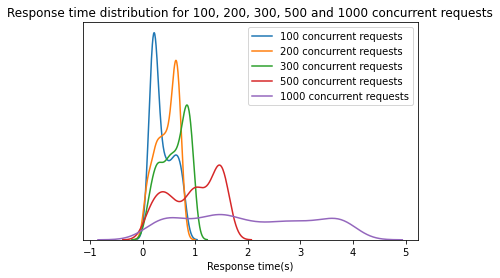

In [91]:
fig, ax = plt.subplots()

plt1 = sns.kdeplot(get_response_time(100), ax = ax).set(
    xlabel = "Response time(s)",
    ylabel = "",
    yticks = [])
plt2 = sns.kdeplot(get_response_time(200), ax = ax).set(
    xlabel = "Response time(s)",
    ylabel = "",
    yticks = [],
)
plt3 = sns.kdeplot(get_response_time(300), ax = ax).set(
    xlabel = "Response time(s)",
    ylabel = "",
    yticks = [],
)
plt3 = sns.kdeplot(get_response_time(500), ax = ax).set(
    xlabel = "Response time(s)",
    ylabel = "",
    yticks = [],
)
plt3 = sns.kdeplot(get_response_time(1000), ax = ax).set(
    title = "Response time distribution for 100, 200, 300, 500 and 1000 concurrent requests", 
    xlabel = "Response time(s)",
    ylabel = "",
    yticks = [],
)

ax.legend(['100 concurrent requests', '200 concurrent requests', '300 concurrent requests', '500 concurrent requests', '1000 concurrent requests'])